In [1]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Warning message:
"package 'ggplot2' was built under R version 4.0.2"


In [2]:
library("ggplot2")
options(repr.plot.height=6,repr.plot.width=8 , repr.plot.res = 200)

In [3]:
install.packages("tidyr")

Installing package into 'C:/Users/Usuario/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'tidyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Usuario\AppData\Local\Temp\RtmpeyjD08\downloaded_packages


Cargar los datos en un dataframe llamado: airbnb

In [4]:
airbnb<-read.csv('data//airbnb.csv',sep = ',')

Mostrar las primeras 6 filas del dataframe

In [5]:
head(airbnb, 6)

Zipcode Neighbourhood.Cleansed Property.Type Room.Type       Accommodates
1 28004   Universidad            Apartment     Private room    2           
2 28004   Universidad            Apartment     Entire home/apt 6           
3 28004   Universidad            Apartment     Entire home/apt 3           
4 28004   Universidad            Loft          Entire home/apt 3           
5 28015   Universidad            Apartment     Entire home/apt 5           
6 28004   Universidad            Apartment     Entire home/apt 2           
  Bathrooms Bedrooms Beds Bed.Type
1 2         1        1    Real Bed
2 1         3        5    Real Bed
3 1         2        2    Real Bed
4 2         1        1    Real Bed
5 1         1        1    Real Bed
6 1         0        1    Real Bed
  Amenities                                                                                                                                                                                                                                                                                                                                                       
1 TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron                                                                                                                                                                             
2 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo                                                                                                                                                                                     
3 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace                                                                                                                                                                                          
4 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                          
5 TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron                                                                                                                                                                                                              
6 TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry
  Square.Feet Price Review.Scores.Rating
1  NA         35     NA                 
2  NA         92     96                 
3  NA         55     91                 
4  NA         60    100                 
5 538         75     90                 
6  NA         55     95

Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [6]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")

In [7]:
colnames(airbnb) <- newnames

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [8]:
airbnb$MetrosCuadrados <- (airbnb$PiesCuadrados*0.092903)

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [9]:
airbnb$CodigoPostal[nchar(airbnb$CodigoPostal)<5] <- paste(substring(airbnb$CodigoPostal,0,2),0,substring(airbnb$CodigoPostal,2,4),sp="")

Warning message in airbnb$CodigoPostal[nchar(airbnb$CodigoPostal) < 5] <- paste(substring(airbnb$CodigoPostal, :
"número de items para para sustituir no es un múltiplo de la longitud del reemplazo"


In [10]:
airbnb$CodigoPostal[airbnb$CodigoPostal == '-'] <- NA

In [11]:
airbnb$CodigoPostal[substring(airbnb$CodigoPostal,0,3) != '280'] <- NA

In [12]:
airbnb$CodigoPostal[nchar(airbnb$CodigoPostal) < 3] <- NA

In [13]:
airbnb$CodigoPostal <- substring(airbnb$CodigoPostal,0,5)

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [14]:
unique(airbnb$CodigoPostal)

[1] "28004" "28015" "28013" "28005" "28012" "28014" "28045" NA      "28007"
[10] "28028" "28009" "28001" "28006" "28010" "28002" "28034" "28050" "28008"
[19] "28011" "28049" "28038" "28053" "28047" "28025" "28019" "28024" "28016"
[28] "28036" "28046" "28039" "28020" "28003" "28029" "28054" "28041" "28026"
[37] "28058" "28018" "28030" "28017" "28027" "28043" "28033" "28055" "28021"
[46] "28032" "28037" "28022" "28042" "28094" "28035" "28040" "28031" "28044"
[55] "28023" "28051" "28048" "28056" "28060" "28052"

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [15]:
table_airbnb <- table(airbnb$CodigoPosta)
airbnb2 <- data.frame(table_airbnb)
colnames(airbnb2) <- c("CodigoPostal","Entradas")
airbnb2 <- airbnb2[with(airbnb2, order(-Entradas)), ]

Códigos postales con más entradas:

In [16]:
head(airbnb2,5)

CodigoPostal Entradas
12 28012        2060    
4  28004        1794    
5  28005        1194    
13 28013        1019    
14 28014         630

Códigos postales con menos entradas:

In [17]:
tail(airbnb2, 5)

CodigoPostal Entradas
52 28052        1       
56 28056        1       
57 28058        1       
58 28060        1       
59 28094        1

¿Cuales son los barrios que hay en el código postal 28012?

In [18]:
barrios = airbnb[airbnb$CodigoPostal == '28012',] 
barrios_individuales = unique(barrios$Barrio)
barrios_individuales

[1] "Sol"             "Acacias"         NA                "Palos de Moguer"
 [5] "Embajadores"     "Cortes"          "Palacio"         "Universidad"    
 [9] "Delicias"        "Arapiles"        "Atocha"          "Goya"

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [19]:

table_airbnb <- table(barrios$Barrio)
num_entradas <- data.frame(table_airbnb)
colnames(num_entradas) <- c("Barrio","Entradas")
num_entradas <- num_entradas[with(num_entradas, order(-Entradas)), ]
num_entradas

Barrio          Entradas
6  Embajadores     1449    
10 Sol              301    
4  Cortes           216    
9  Palos de Moguer   46    
8  Palacio           27    
1  Acacias           13    
11 Universidad        4    
2  Arapiles           1    
3  Atocha             1    
5  Delicias           1    
7  Goya               1

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

Número total de barrios en el dataset

In [20]:
table_airbnb <- table(airbnb$Barrio)
num_barrios <- data.frame(table_airbnb)
colnames(num_barrios) <- c("Barrio","Frecuencia")
num_barrios = nrow(num_barrios)
num_barrios 

[1] 125

Lista de Barrios

In [21]:
unique(airbnb$Barrio)

[1] "Universidad"                    "Sol"                           
  [3] "Imperial"                       "Acacias"                       
  [5] "Chopera"                        "Delicias"                      
  [7] "Palos de Moguer"                "Embajadores"                   
  [9] "Cortes"                         "Atocha"                        
 [11] "PacÃ­fico"                      "Adelfas"                       
 [13] "Estrella"                       "Ibiza"                         
 [15] "JerÃ³nimos"                     "NiÃ±o JesÃºs"                  
 [17] "Palacio"                        "Justicia"                      
 [19] "Recoletos"                      "Goya"                          
 [21] "Fuente del Berro"               "Arapiles"                      
 [23] "Trafalgar"                      "Almagro"                       
 [25] "Guindalera"                     "Lista"                         
 [27] "Castellana"                     "El Viso"                       
 [29] "Prosperidad"                    "Valverde"                      
 [31] "Casa de Campo"                  "El Goloso"                     
 [33] "Numancia"                       "CÃ¡rmenes"                     
 [35] "Puerta del Angel"               "Lucero"                        
 [37] "Aluche"                         "San Isidro"                    
 [39] "Campamento"                     "Comillas"                      
 [41] "OpaÃ±el"                        "Vista Alegre"                  
 [43] "Ciudad JardÃ­n"                 "HispanoamÃ©rica"               
 [45] "Nueva EspaÃ±a"                  "Castilla"                      
 [47] "Bellas Vistas"                  "Cuatro Caminos"                
 [49] "Castillejos"                    "Vallehermoso"                  
 [51] "Almenara"                       "Valdeacederas"                 
 [53] "Berruguete"                     "Gaztambide"                    
 [55] "Rios Rosas"                     "PeÃ±agrande"                   
 [57] "ArgÃ¼elles"                     "Puerta Bonita"                 
 [59] "Buenavista"                     "Abrantes"                      
 [61] "Orcasur"                        "San FermÃ­n"                   
 [63] "Almendrales"                    "Pradolongo"                    
 [65] "Portazgo"                       "EntrevÃ­as"                    
 [67] "San Diego"                      "Palomeras Bajas"               
 [69] "FontarrÃ³n"                     "Vinateros"                     
 [71] "Ventas"                         "Pueblo Nuevo"                  
 [73] "Quintana"                       "ConcepciÃ³n"                   
 [75] "San Juan Bautista"              "Costillares"                   
 [77] "Piovera"                        "Canillas"                      
 [79] "Pinar del Rey"                  "Apostol Santiago"              
 [81] "San AndrÃ©s"                    "Valdefuentes"                  
 [83] "Butarque"                       "Los Angeles"                   
 [85] "Casco HistÃ³rico de VicÃ¡lvaro" "Simancas"                      
 [87] "Rejas"                          "Salvador"                      
 [89] "Casco HistÃ³rico de Barajas"    "Pilar"                         
 [91] "La Paz"                         "Mirasierra"                    
 [93] "Ciudad Universitaria"           "MoscardÃ³"                     
 [95] "Palomeras Sureste"              "Marroquina"                    
 [97] "Media Legua"                    "Los Rosales"                   
 [99] "Casco HistÃ³rico de Vallecas"   "TimÃ³n"                        
[101] "Corralejos"                     "Cuatro Vientos"                
[103] "Colina"                         "San Cristobal"                 
[105] "Alameda de Osuna"               "Aeropuerto"                    
[107] "Palomas"                        "ZofÃ­o"                        
[109] "Aguilas"                        "Legazpi"                       
[111] "Fuentelareina"                  "Ar

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [22]:
table_airbnb <- table(barrios$Barrio)
num_entradas <- data.frame(table_airbnb)
colnames(num_entradas) <- c("Barrio","Entradas")
num_entradas <- num_entradas[with(num_entradas, order(-Entradas)), ]
head(num_entradas,5)

Barrio          Entradas
6  Embajadores     1449    
10 Sol              301    
4  Cortes           216    
9  Palos de Moguer   46    
8  Palacio           27

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

Número de alquileres diferentes:

In [23]:
table_airbnb <- table(airbnb$TipoAlquiler)
tipos_alquiler_df <- data.frame(table_airbnb)
colnames(tipos_alquiler_df) <- c("Barrio","Entradas")
num_tipos_alquiler = nrow(tipos_alquiler_df)
num_tipos_alquiler 

[1] 3

Tipos de alquiler diferentes:

In [24]:
tipos_alquiler = unique(airbnb$TipoAlquiler)
tipos_alquiler

[1] "Private room"    "Entire home/apt" "Shared room"

Entradas en el dataframe por cada tipo:

In [25]:
tipos_alquiler_df

Barrio          Entradas
1 Entire home/apt 7903    
2 Private room    5113    
3 Shared room      191

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
"Removed 9 rows containing non-finite values (stat_boxplot)."


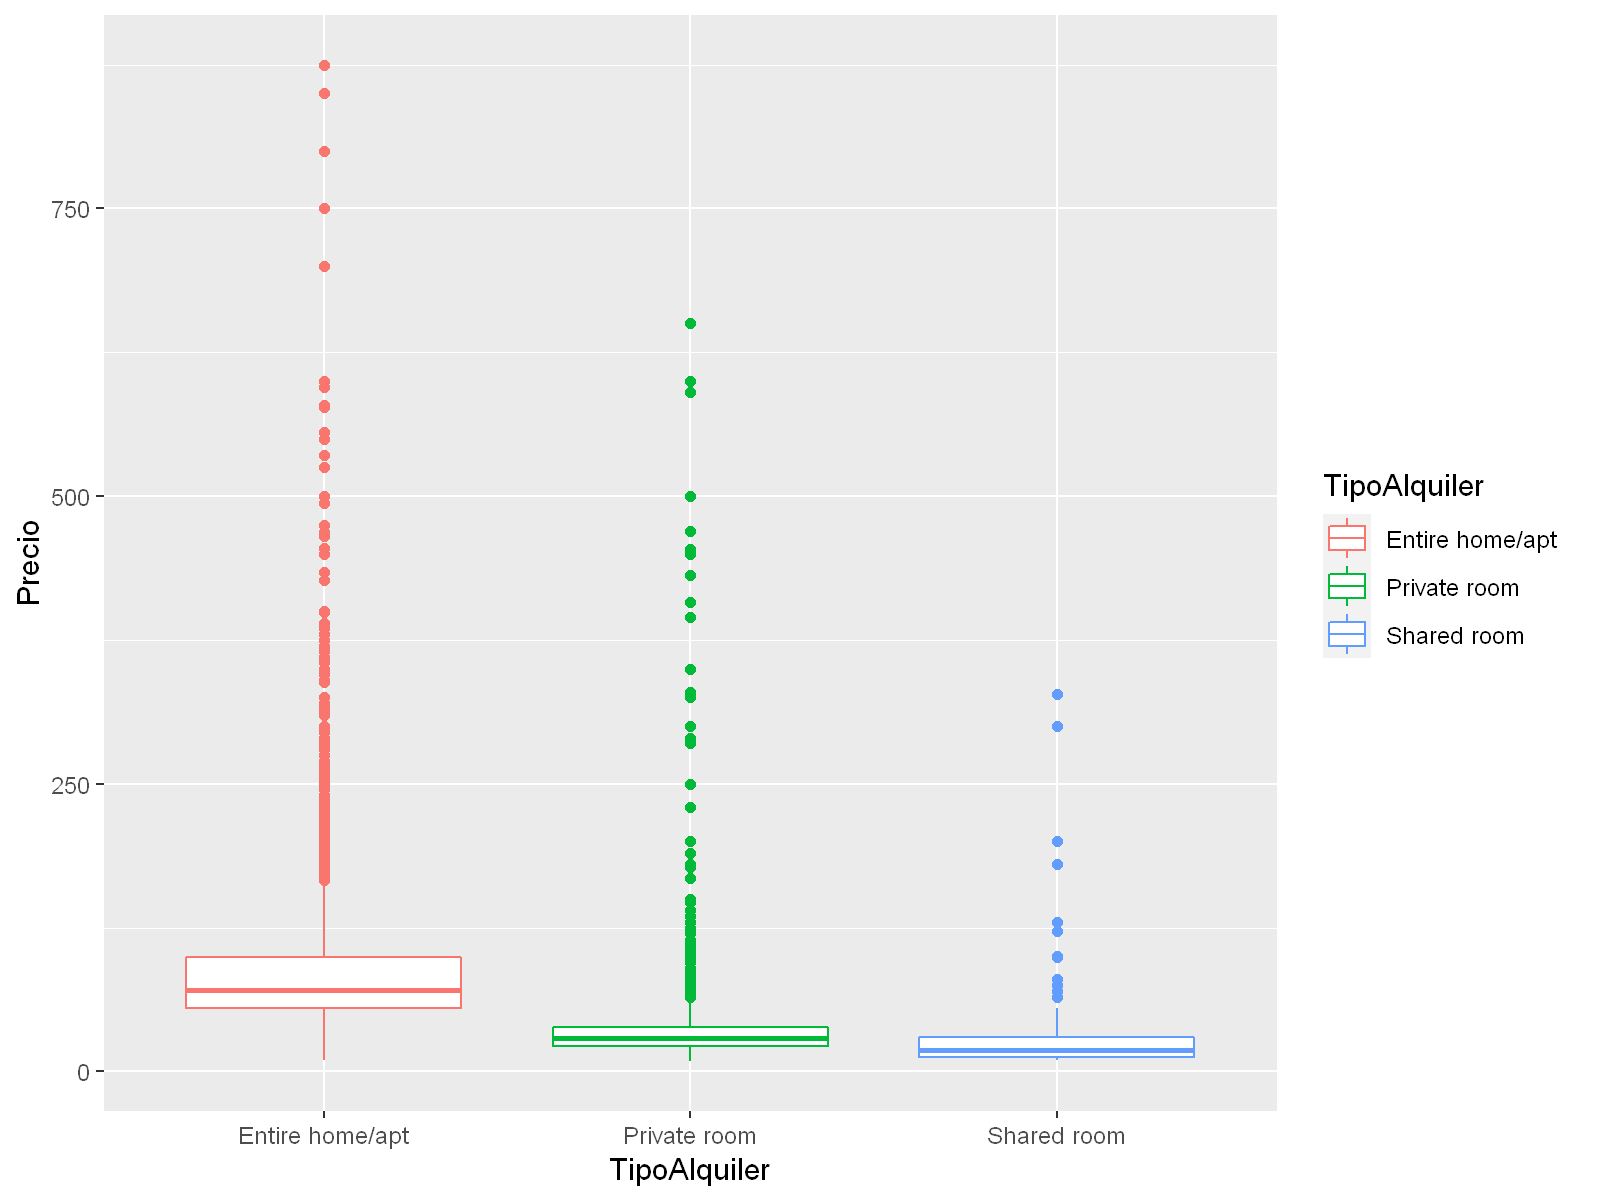

In [26]:
ggplot(data=airbnb, aes(x=TipoAlquiler, y=Precio, color=TipoAlquiler))+geom_boxplot()

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [27]:
entire_home <- airbnb[airbnb$TipoAlquiler == 'Entire home/apt',]
private_room <- airbnb[airbnb$TipoAlquiler == 'Private room',]
shared_room <- airbnb[airbnb$TipoAlquiler == 'Shared room',]

In [28]:
price_medium_entire_home = mean(na.omit(entire_home$Precio))
price_medium_private_room = mean(na.omit(private_room$Precio))
price_medium_shared_room = mean(na.omit(shared_room$Precio))

Precio medio de Entire home/apt:

In [29]:
 round(price_medium_entire_home, digits=2)

[1] 87.3

Precio medio de Private room:

In [30]:
round(price_medium_private_room, digits=2)

[1] 34.26

Precio medio de Shared room:

In [31]:
round(price_medium_shared_room, digits=2)

[1] 29.85

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [32]:
airbnb_entire = airbnb[airbnb$TipoAlquiler == 'Entire home/apt',]

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire

In [33]:
table_airbnb <- table(airbnb_entire$Barrio)
apartamentos <- data.frame(table_airbnb)
colnames(apartamentos) <- c("Barrio","num_apartamentos")
num_apartamentos <- apartamentos[with(apartamentos, order(-num_apartamentos)), ]

Número de apartamentos por barrio:

In [34]:
head(num_apartamentos,5)

Barrio      num_apartamentos
45  Embajadores 1228            
109 Universidad  984            
76  Palacio      769            
106 Sol          701            
39  Cortes       574

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [35]:
precio_medio_barrio = aggregate(airbnb_entire$Precio, by = list(airbnb_entire$Barrio), FUN = mean, na.rm = TRUE)
colnames(precio_medio_barrio) <- c("Barrio","Precio_medio")
precio_medio <- precio_medio_barrio[with(precio_medio_barrio, order(-Precio_medio)), ]

Lista de 5 barrios con mayor precio medio para apartamentos enteros:

In [36]:
head(precio_medio,5)

Barrio        Precio_medio
77 Palomas       309.7500    
50 Fuentelareina 180.0000    
93 Recoletos     161.9254    
43 El PlantÃ­o   150.0000    
30 Castellana    141.3889

¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [37]:
main_df <- merge(precio_medio,num_apartamentos,by=c("Barrio"))
head(main_df,5)

Barrio     Precio_medio num_apartamentos
1 Abrantes   46.00000      3              
2 Acacias    68.16393     61              
3 Adelfas    68.72727     33              
4 Aeropuerto 38.00000      2              
5 Aguilas    54.50000      2

Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [38]:
new_main_df = main_df[main_df$num_apartamentos > 100,]
new_main_df <- new_main_df[with(new_main_df, order(-Precio_medio)), ]

In [39]:
head(new_main_df,5)

Barrio    Precio_medio num_apartamentos
93  Recoletos 161.92537    135             
52  Goya      111.33803    142             
106 Sol       100.75036    701             
108 Trafalgar  98.57848    223             
59  Justicia   98.25468    534

Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [40]:
metros_cuadrados_barrio = aggregate(airbnb_entire$MetrosCuadrados, by = list(airbnb_entire$Barrio), FUN = mean, na.rm = TRUE)
colnames(metros_cuadrados_barrio) <- c("Barrio","Metros_cuadrados")
main_2 = merge(metros_cuadrados_barrio,new_main_df,by=c("Barrio"))
main_2 <- main_2[with(main_2, order(-Precio_medio)), ]

In [41]:
head(main_2,5)

Barrio    Metros_cuadrados Precio_medio num_apartamentos
8  Recoletos 26.66316         161.92537    135             
4  Goya      51.68504         111.33803    142             
9  Sol       45.61692         100.75036    701             
10 Trafalgar 29.30426          98.57848    223             
5  Justicia  28.52669          98.25468    534

Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Densidad de distribuición de Recoletos:

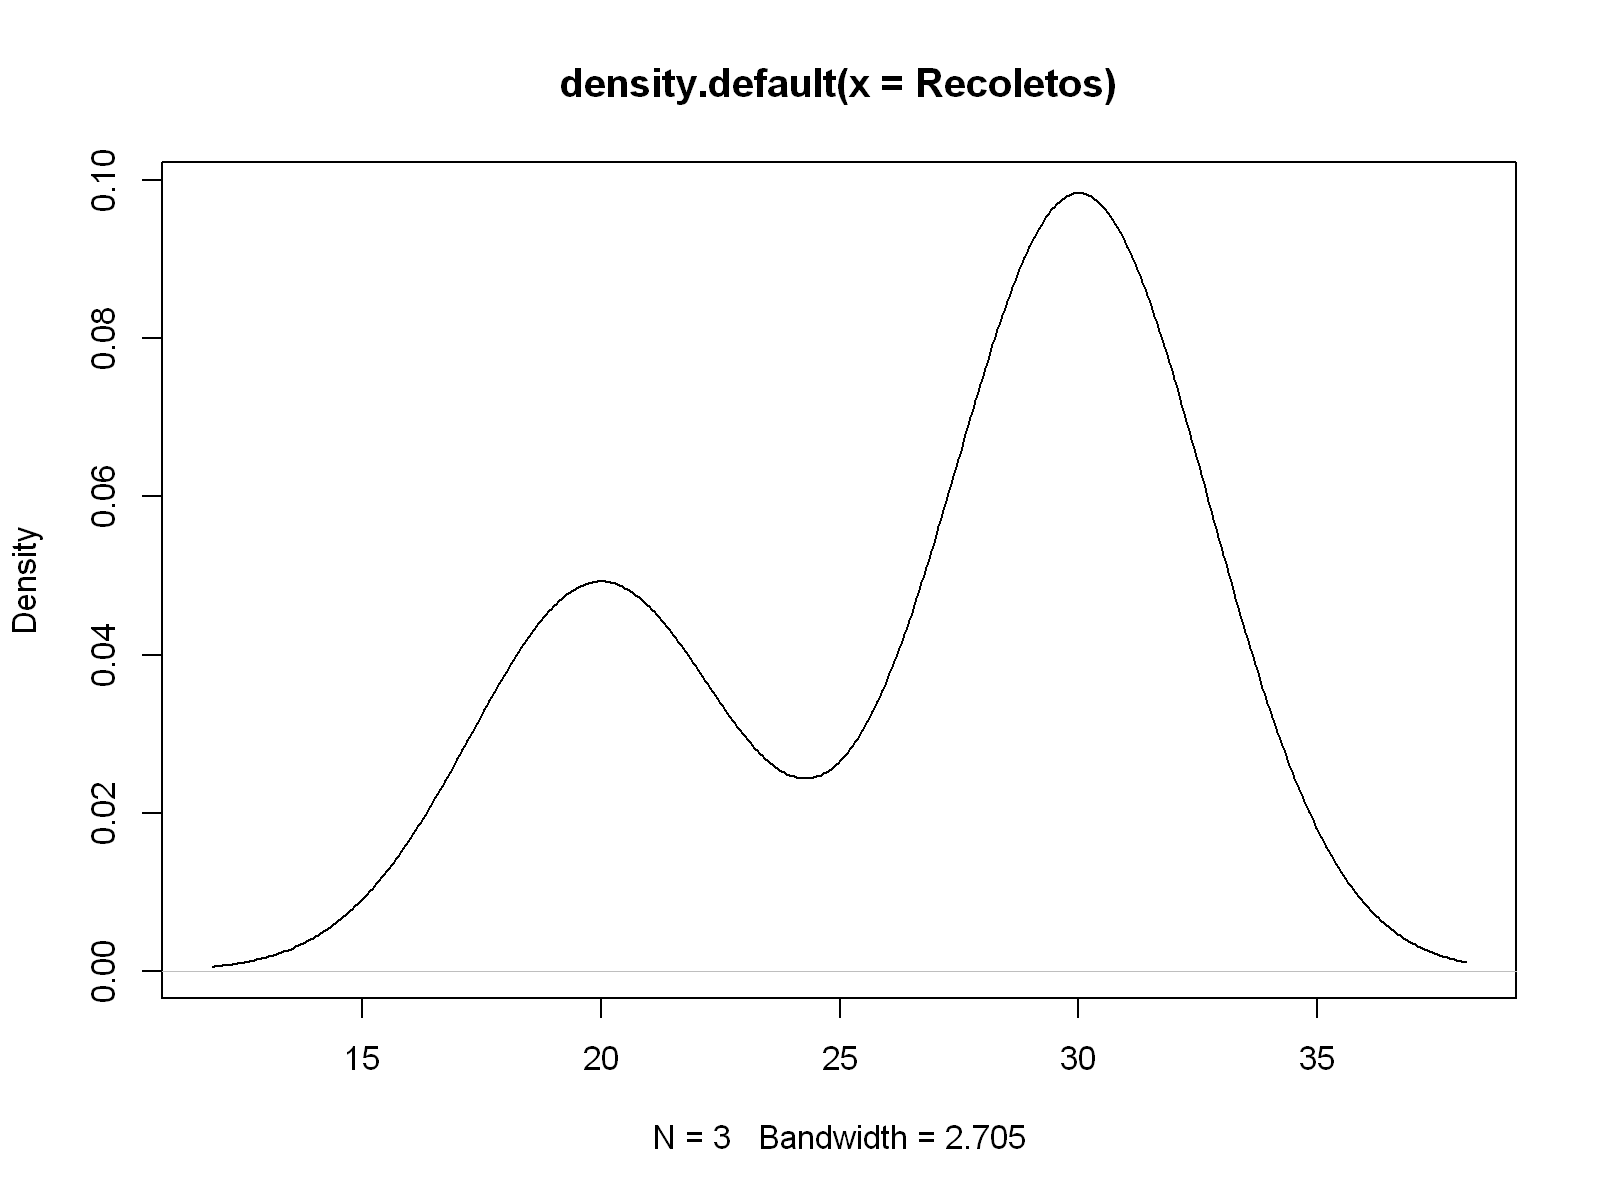

In [42]:
Recoletos = c(na.omit(airbnb$MetrosCuadrados[airbnb$Barrio == 'Recoletos']))
plot(density(Recoletos))

Densidad de distribuición de Goya:

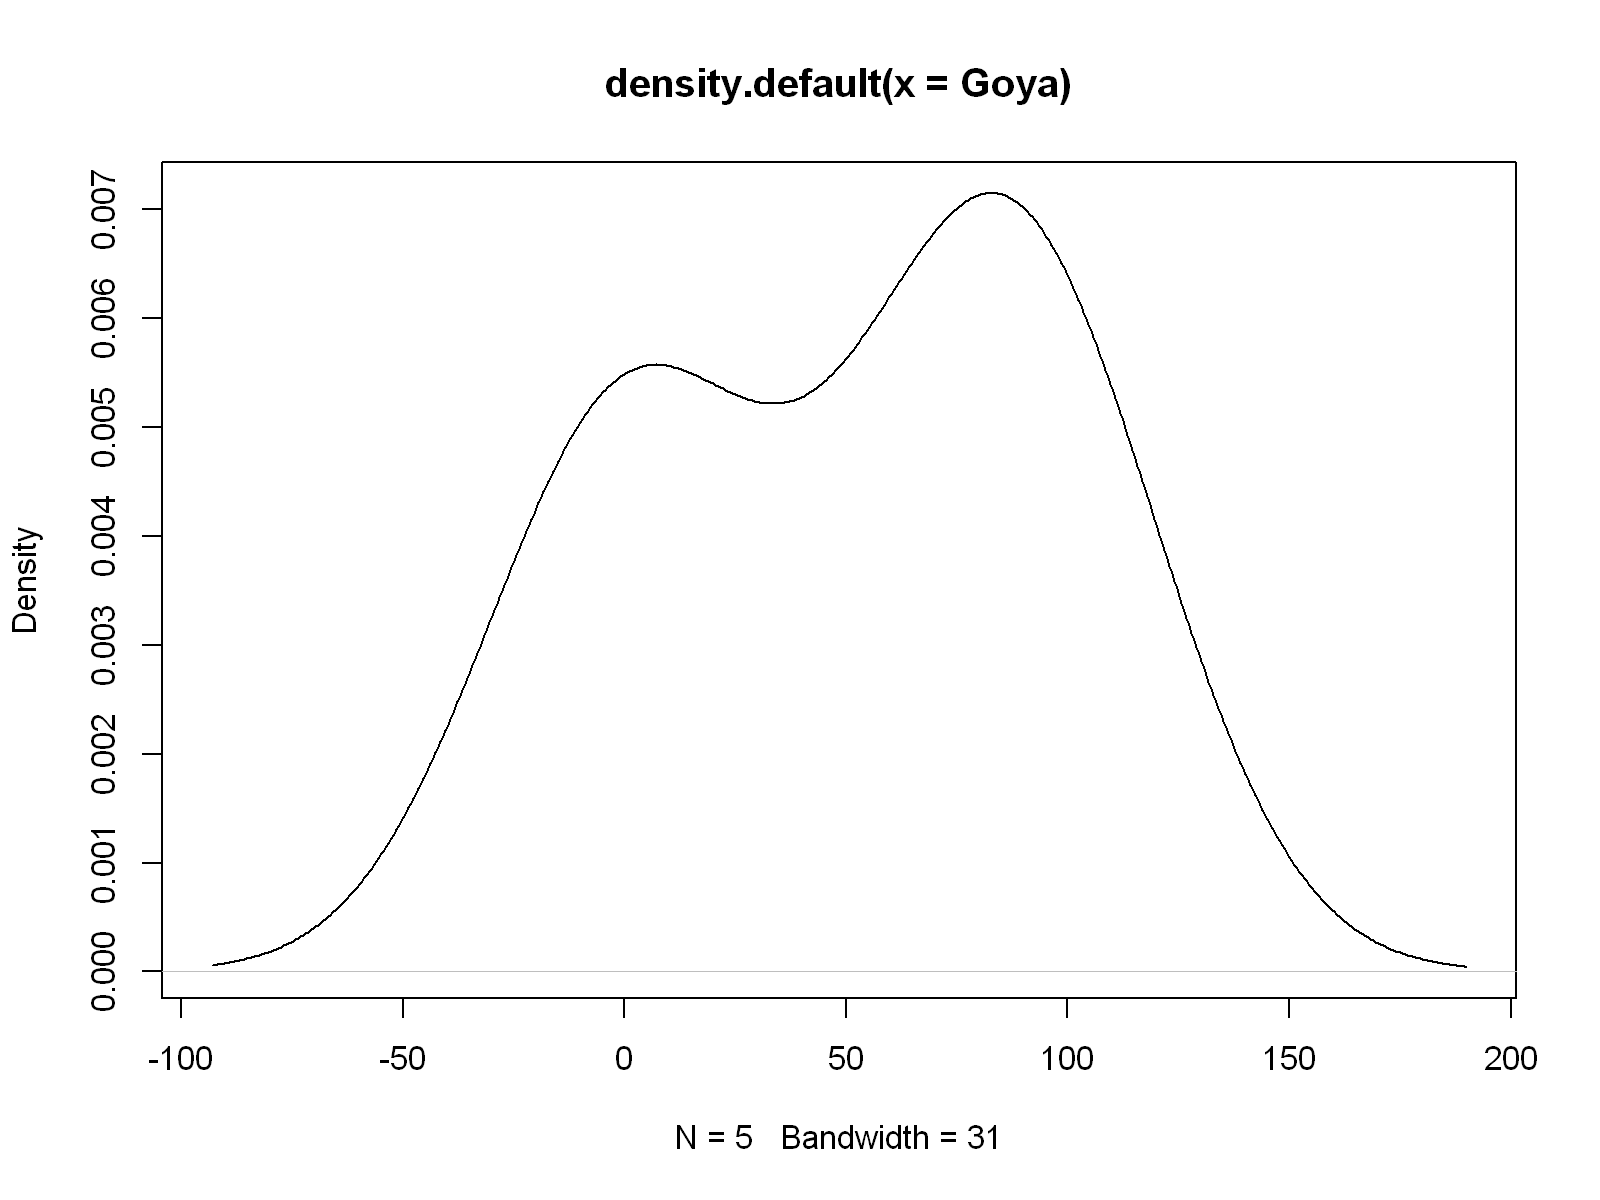

In [43]:
Goya = c(na.omit(airbnb$MetrosCuadrados[airbnb$Barrio == 'Goya']))
plot(density(Goya))

Densidad de distribuición de Sol:

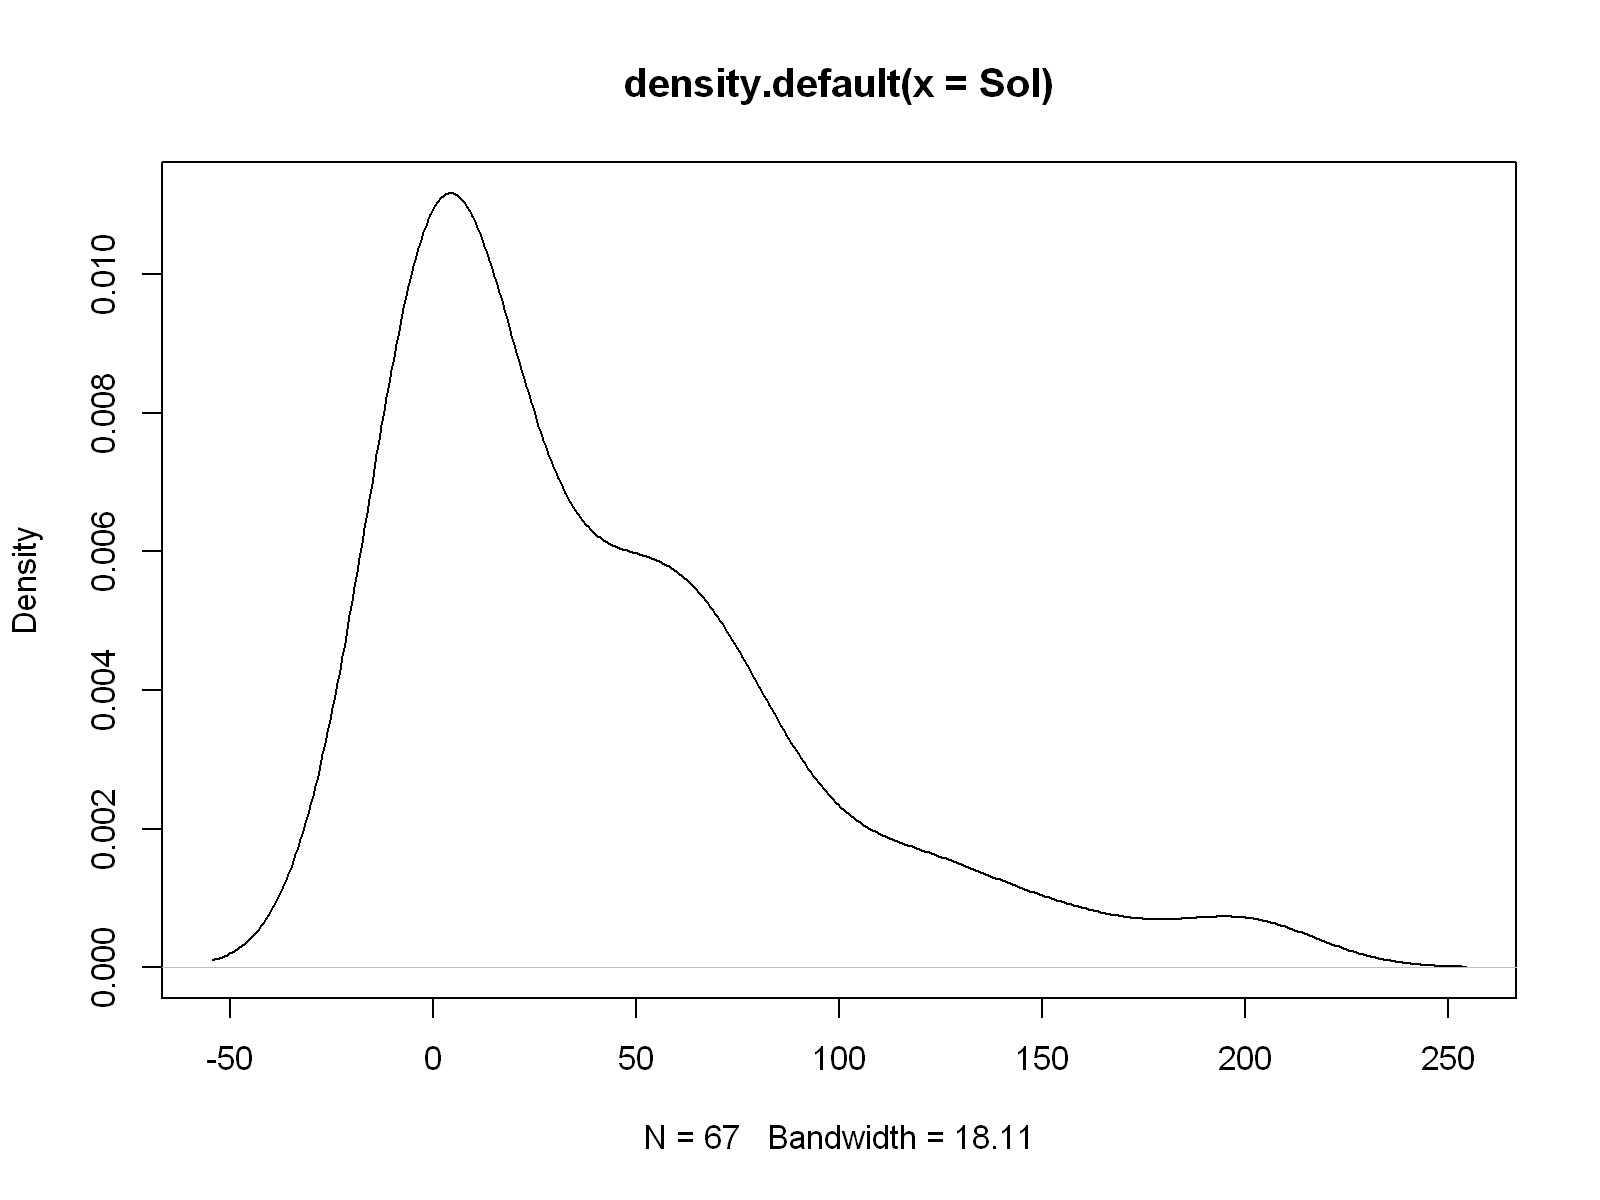

In [44]:
Sol = c(na.omit(airbnb$MetrosCuadrados[airbnb$Barrio == 'Sol']))
plot(density(Sol))

Densidad de distribuición de Trafalgar:

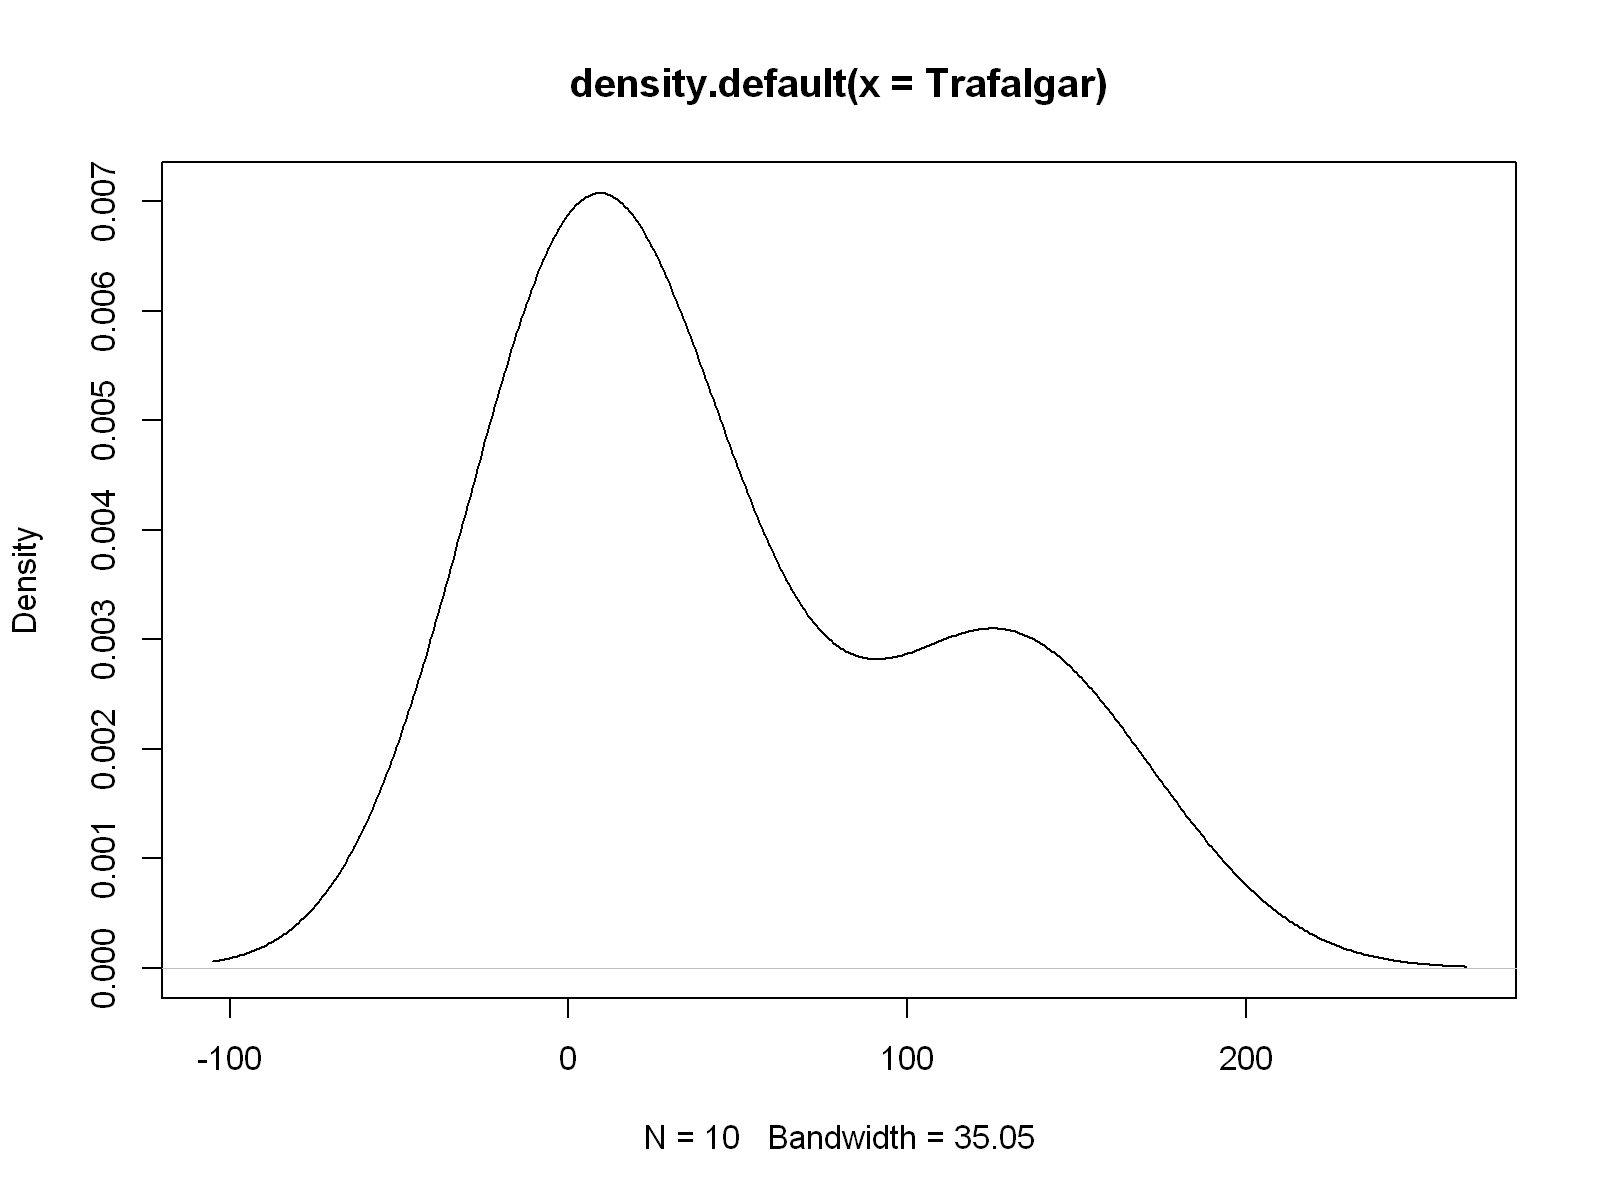

In [45]:
Trafalgar = c(na.omit(airbnb$MetrosCuadrados[airbnb$Barrio == 'Trafalgar']))
plot(density(Trafalgar))

Densidad de distribuición de Justicia:

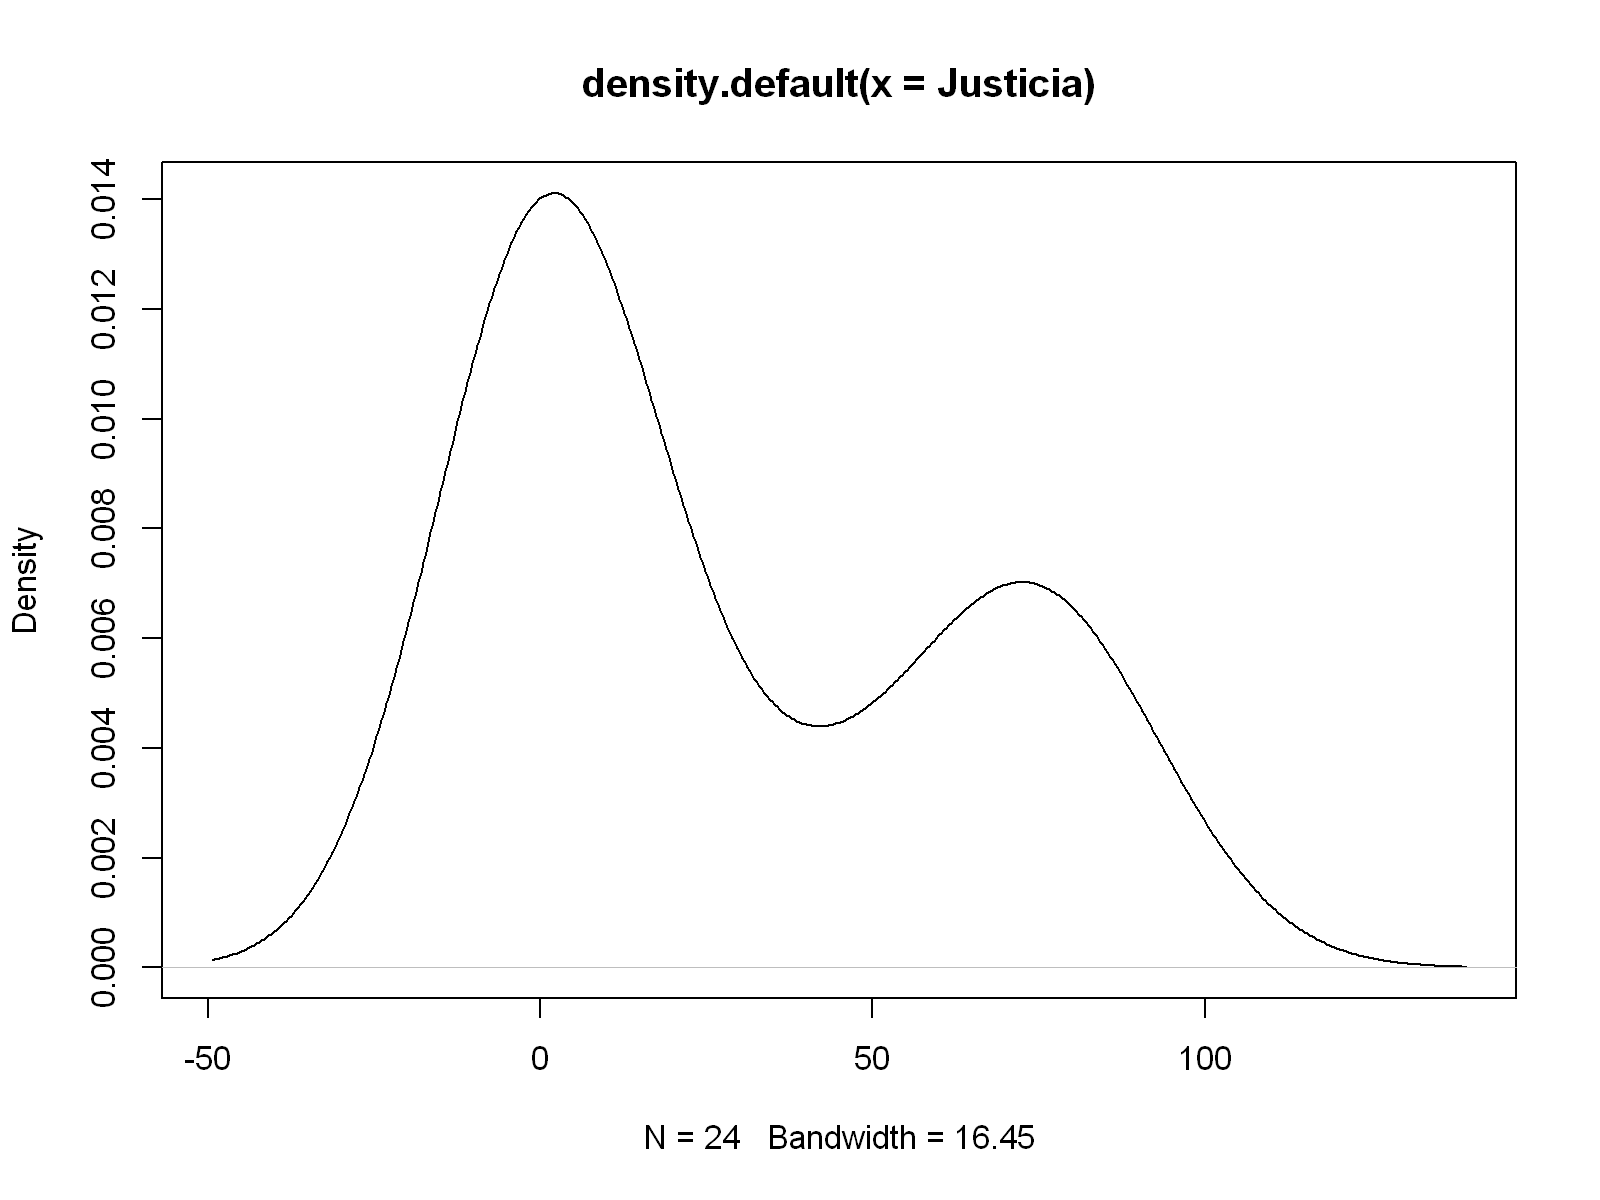

In [46]:
Justicia = c(na.omit(airbnb$MetrosCuadrados[airbnb$Barrio == 'Justicia']))
plot(density(Justicia))

Esta claro que las medias de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [47]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")

In [48]:
model <- lm(data=barrio_sol, formula = MaxOcupantes ~ NumDormitorios)
summary(model)


Call:
lm(formula = MaxOcupantes ~ NumDormitorios, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6052 -0.9541  0.0459  0.4955  7.3948 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.40373    0.08842   27.19   <2e-16 ***
NumDormitorios  1.55038    0.05023   30.86   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.339 on 699 degrees of freedom
Multiple R-squared:  0.5768,	Adjusted R-squared:  0.5762 
F-statistic: 952.6 on 1 and 699 DF,  p-value: < 2.2e-16


In [49]:
model <- lm(data=barrio_sol, formula = MetrosCuadrados ~ NumDormitorios)
summary(model)


Call:
lm(formula = MetrosCuadrados ~ NumDormitorios, data = barrio_sol)

Residuals:
     Min       1Q   Median       3Q      Max 
-108.089  -32.109    7.428   27.906  117.258 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       6.783      9.258   0.733    0.467    
NumDormitorios   25.327      4.813   5.262 2.16e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 43.3 on 58 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.3231,	Adjusted R-squared:  0.3115 
F-statistic: 27.69 on 1 and 58 DF,  p-value: 2.158e-06


Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [50]:
df_sol <- subset(barrio_sol, select=c("NumBanyos", "NumDormitorios", "MaxOcupantes", "MetrosCuadrados"))

In [51]:
round(cor(df_sol),2)  

NumBanyos NumDormitorios MaxOcupantes MetrosCuadrados
NumBanyos       1.00      0.68           0.66         NA             
NumDormitorios  0.68      1.00           0.76         NA             
MaxOcupantes    0.66      0.76           1.00         NA             
MetrosCuadrados   NA        NA             NA          1

Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que no tienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


In [52]:
df_sol <- na.omit(df_sol)
round(cor(df_sol),2)  

NumBanyos NumDormitorios MaxOcupantes MetrosCuadrados
NumBanyos       1.00      0.69           0.70         0.48           
NumDormitorios  0.69      1.00           0.79         0.57           
MaxOcupantes    0.70      0.79           1.00         0.43           
MetrosCuadrados 0.48      0.57           0.43         1.00

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [53]:
df_sol_precio <- subset(barrio_sol, select=c("Precio","NumBanyos", "NumDormitorios", "MaxOcupantes", "MetrosCuadrados"))
round(cor(df_sol_precio),2)  

Precio NumBanyos NumDormitorios MaxOcupantes MetrosCuadrados
Precio          1.00   0.65      0.65           0.66         NA             
NumBanyos       0.65   1.00      0.68           0.66         NA             
NumDormitorios  0.65   0.68      1.00           0.76         NA             
MaxOcupantes    0.66   0.66      0.76           1.00         NA             
MetrosCuadrados   NA     NA        NA             NA          1

¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [54]:
df_sol <- subset(barrio_sol, select=c("Precio", "MetrosCuadrados", "NumDormitorios"))
df_sol <- df_sol[df_sol$MetrosCuadrados > 0,]
df_sol <- df_sol[df_sol$Precio > 0,]

In [55]:
model_num_dormitorios <- lm(data=df_sol, formula = Precio ~ NumDormitorios)
summary(model)


Call:
lm(formula = MetrosCuadrados ~ NumDormitorios, data = barrio_sol)

Residuals:
     Min       1Q   Median       3Q      Max 
-108.089  -32.109    7.428   27.906  117.258 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       6.783      9.258   0.733    0.467    
NumDormitorios   25.327      4.813   5.262 2.16e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 43.3 on 58 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.3231,	Adjusted R-squared:  0.3115 
F-statistic: 27.69 on 1 and 58 DF,  p-value: 2.158e-06


In [56]:
model_metros_cuadrados <- lm(data=df_sol, formula = Precio ~ MetrosCuadrados)
summary(model)


Call:
lm(formula = MetrosCuadrados ~ NumDormitorios, data = barrio_sol)

Residuals:
     Min       1Q   Median       3Q      Max 
-108.089  -32.109    7.428   27.906  117.258 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       6.783      9.258   0.733    0.467    
NumDormitorios   25.327      4.813   5.262 2.16e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 43.3 on 58 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.3231,	Adjusted R-squared:  0.3115 
F-statistic: 27.69 on 1 and 58 DF,  p-value: 2.158e-06


El número de habitaciones nos permite conocer mejor el precio del inmueble.

Data frame del barrio de sol para calcular los siguientes ejercicios:

In [57]:
df_sol <- subset(barrio_sol, select=c("Precio", "MetrosCuadrados", "NumDormitorios"))
df_sol <- df_sol[df_sol$MetrosCuadrados > 0,]
df_sol <- df_sol[df_sol$Precio > 0,]
df_sol <- na.omit(df_sol) 
media_precio_metro_cuadrado <- mean(df_sol$Precio/df_sol$MetrosCuadrados)
media_precio <- mean(df_sol$Precio)
media_metros_cuadrados <- mean(df_sol$MetrosCuadrados)
media2 = media_precio/media_metros_cuadrados

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

Cálculo de cuanto aumenta el precio por metros cuadrado:

`geom_smooth()` using formula 'y ~ x'



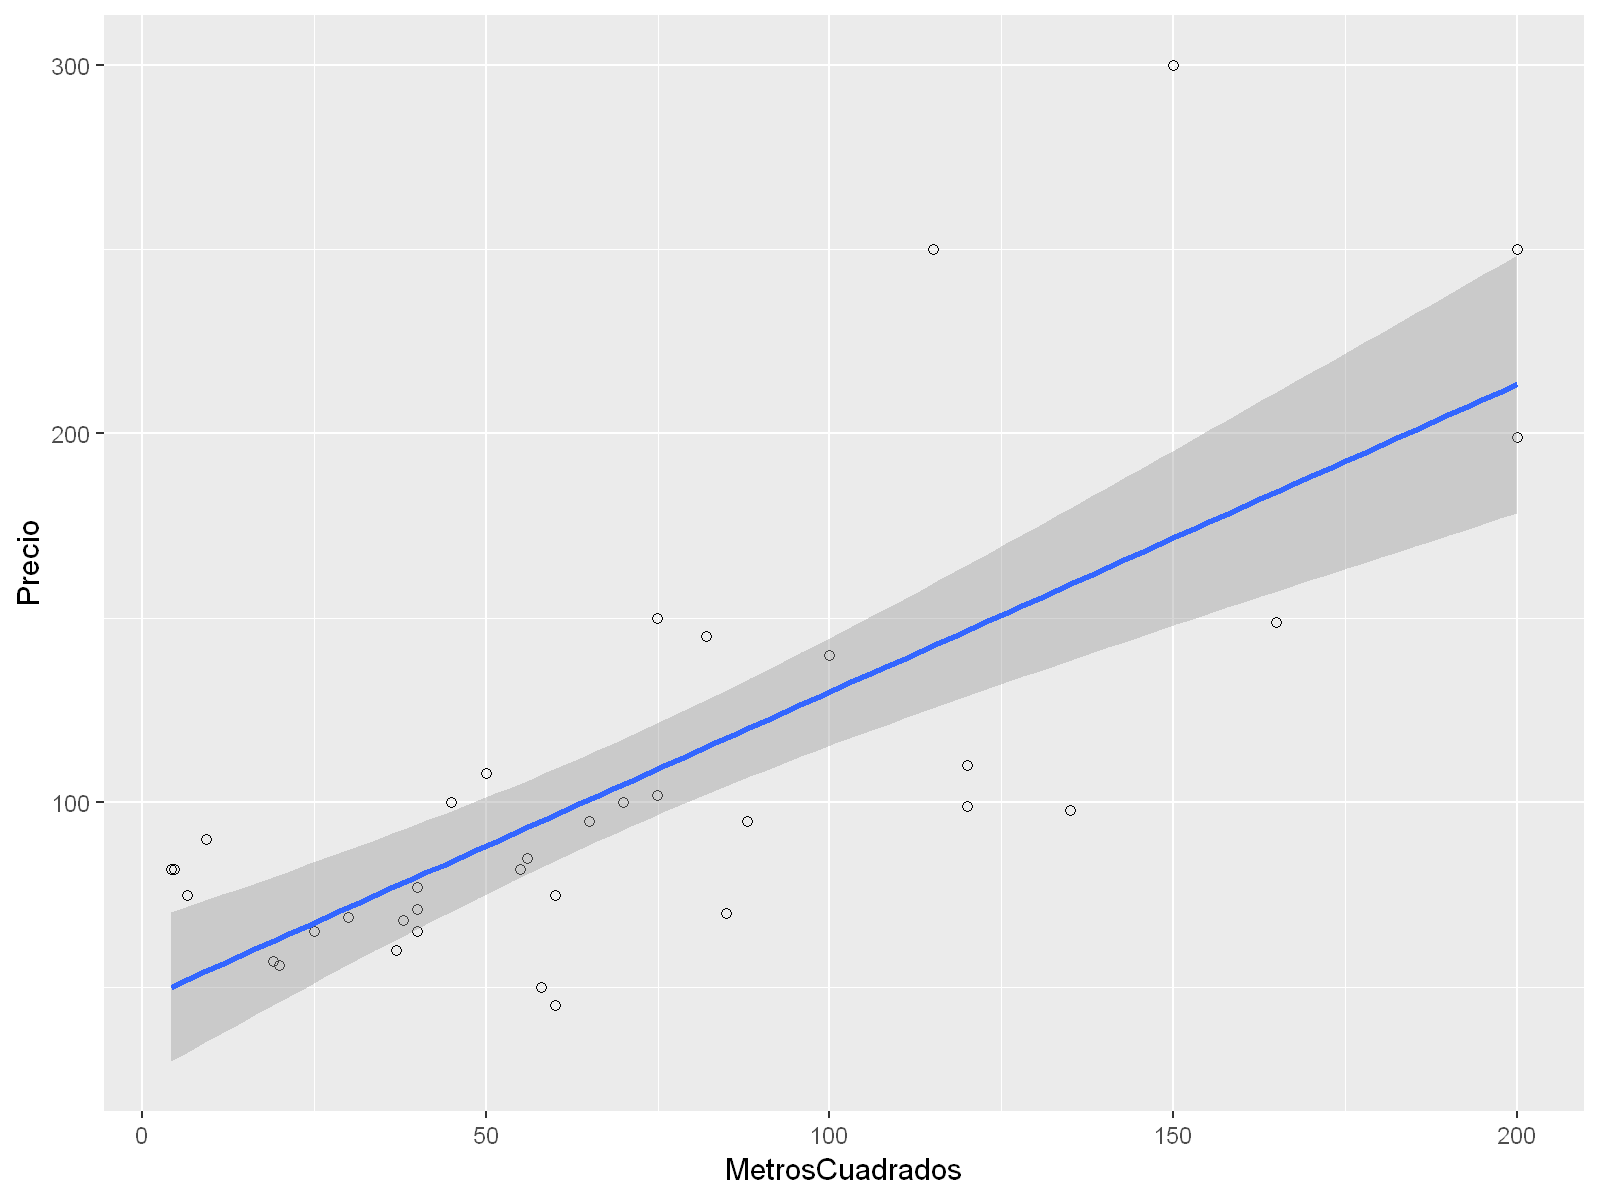

In [58]:
ggplot(df_sol, aes(x=MetrosCuadrados, y=Precio)) +
geom_point(shape=1) +    # genera circulos en el grafico
geom_smooth(method=lm)   # adjunta la linea de regresion por defecto es al 95% de confianza

In [59]:
metros_cuadrados <- data.frame(MetrosCuadrados = seq(50, 75))
predict_metros_cuadrados <- predict(model_metros_cuadrados, metros_cuadrados) # 
result = round(predict_metros_cuadrados[2] - predict_metros_cuadrados[1],4)
result = result*0.64 #Lo múltiplico por el valor de correlación entre precio y metros cuadrados.
result

2 
0.533888

El precio de una vivienda crece 0.53€ por cada metro cuadrado extra.

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

`geom_smooth()` using formula 'y ~ x'



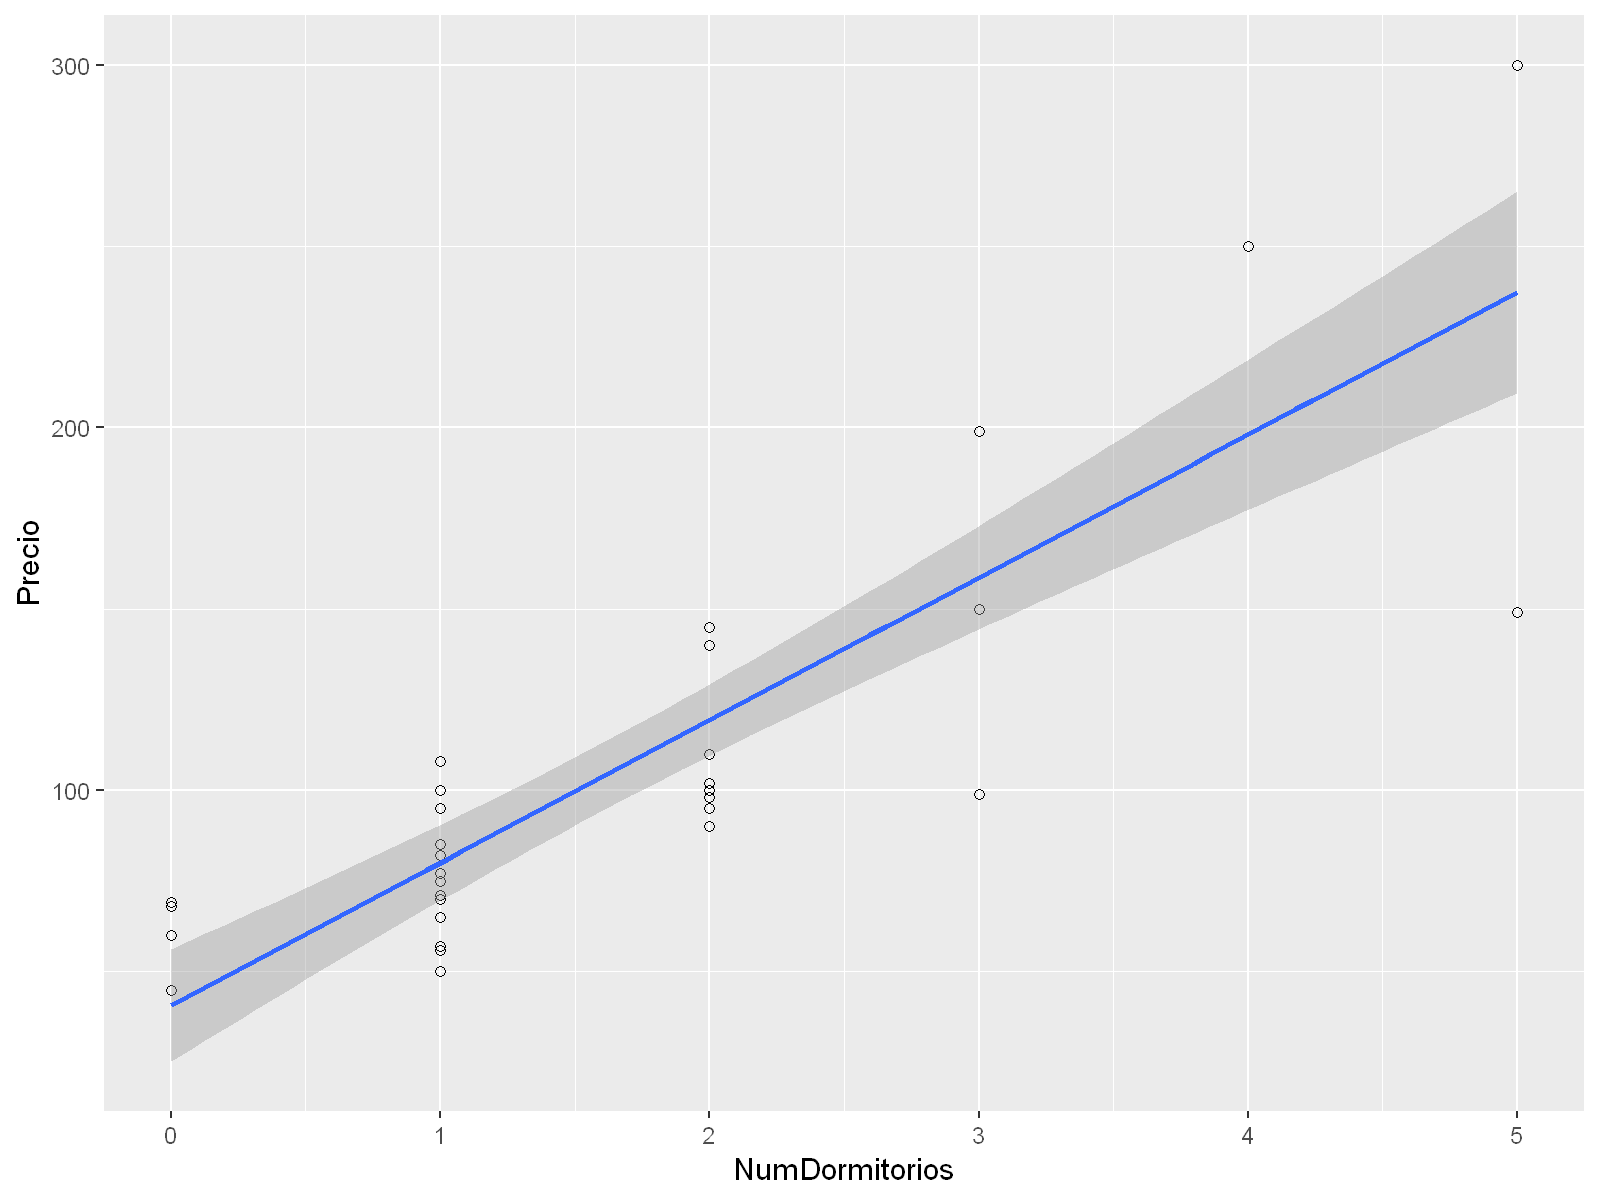

In [60]:
ggplot(df_sol, aes(x=NumDormitorios, y=Precio)) +
geom_point(shape=1) +    # genera circulos en el grafico
geom_smooth(method=lm)   # adjunta la linea de regresion por defecto es al 95% de confianza

In [61]:
dormitorios <- data.frame(NumDormitorios = seq(1, 3))
predict_dormitorios <- predict(model_num_dormitorios, dormitorios)
result = round(predict_dormitorios[2] - predict_dormitorios[1],4)
result = result*0.72 #Lo múltiplico por el valor de correlación entre precio y número de dormitorios.
result

2 
28.29744

El precio de una vivienda crece 28.29€ por cada metro cuadrado extra.

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el margen de error de esa probabilidad?

In [62]:
viviendas3 <- barrio_sol[barrio_sol$NumDormitorios == 3,]

In [63]:
total_viviendas <- nrow(barrio_sol)
total_viviendas3 <- nrow(viviendas3)

In [64]:
total_viviendas
total_viviendas3

[1] 701

[1] 55

Probabilidad de encontrar un apartamento en el barrio de sol con 3 dormitorios:

In [65]:
pm <- (total_viviendas3)/(total_viviendas)
pm*100

[1] 7.845934

Margen de error de la probabilidad:

In [66]:
binom.test(55,701)


	Exact binomial test

data:  55 and 701
number of successes = 55, number of trials = 701, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.0596506 0.1009033
sample estimates:
probability of success 
            0.07845934 
